# Predicting The Risk of Diabetes

_Completed by: Sara Compaore, Siddharth Nand, Edric Antoine and Jeff Van Den Berghe_

## **Introduction**

Diabetes refers to a group of diseases that affect how a person's body uses glucose (Diabetes - Symptoms and causes, 2020). Diabetic patients usually have elevated levels of glucose in their bloodstream, leading to other health disorders such as obesity and weight loss. These health disorders act as signs and symptoms for diabetes and are sometimes used as pre-diagnosis tools.

One in 11 people of the world’s adult population suffers from diabetes, with 46% of these cases undiagnosed (Since 1996, the number of people with diabetes in the UK has risen from 1.4 million to 3.5 million. Diabetes prevalence is estimated to rise to 5 million by 2025., 2020). Therefore, it is highly important for scientists to design ways of predicting whether a person is diabetic or not, based on given physical characteristics such as age, gender, weight loss, weakness, visual blurring, obesity, muscle stiffness, partial paresis, etc.

Our project aims to contribute to this issue by answering this question: **To what degree of accuracy can we predict whether or not a person is diabetic given other physical variables?**

The dataset we will use to answer this question is uploaded on http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv and compiles data on physical characteristics of patients (such as age, gender, weight loss, weakness, visual blurring, obesity, muscle stiffness, partial paresis) and their diabetes diagnosis. Its large sample size of 520 also makes it suitable for our analysis. This dataset is a survey from the patients of Sylhet Diabetes Hospital in Sylhet, Banglades and shows if a patient has a high or low risk of diabetes based on specific variables.


*We load and describe our dataset in the Preliminary Data Analysis section*


## Methods and Results

#### Preliminary Data Analysis

The first step in completing our analysis is to install and load the following packages.

In [4]:
# Install packages
install.packages('ggcorrplot')
install.packages('expss')
install.packages('fastDummies')

# load libraries
library(tidyverse)
library(tidymodels)
# library(expss)
library(rvest)
library(repr)
library(stringr)
library(forcats)
library(DBI)
library(lubridate)
library(dplyr)
library(ggcorrplot)
library(GGally)
library(fastDummies)

Installing package into ‘/Users/siddharthnand/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0x/n88cgv0j59x_s2q__xqkm0xc0000gn/T//RtmpDPuL3Y/downloaded_packages


Installing package into ‘/Users/siddharthnand/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0x/n88cgv0j59x_s2q__xqkm0xc0000gn/T//RtmpDPuL3Y/downloaded_packages


Installing package into ‘/Users/siddharthnand/Library/R/4.0/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0x/n88cgv0j59x_s2q__xqkm0xc0000gn/T//RtmpDPuL3Y/downloaded_packages


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Given that we will be exporting our dataset from the web, we will use read_csv to load and observe it.

In [5]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

# Reading data from the web
df <- read_csv(url)
head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  Age = col_double(),
  Gender = col_character(),
  Polyuria = col_character(),
  Polydipsia = col_character(),
  `sudden weight loss` = col_character(),
  weakness = col_character(),
  Polyphagia = col_character(),
  `Genital thrush` = col_character(),
  `visual blurring` = col_character(),
  Itching = col_character(),
  Irritability = col_character(),
  `delayed healing` = col_character(),
  `partial paresis` = col_character(),
  `muscle stiffness` = col_character(),
  Alopecia = col_character(),
  Obesity = col_character(),
  class = col_character()
)




Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


As we can observe, this dataset contains 520 diabetes diagnoses. 

Each diagnosis contains information on these 17 different variables:
1. Age 
2. Gender
3. Polyuria
4. Polydipsia
5. Sudden weight loss
6. weakness 
7. Polyphagia 
8. Genital thrush
9. visual blurring
10. Itching
11. Irritability
12. delayed healing
13. partial paresis
14. muscle stiffness
15. Alopecia
16. Obesity

The last 15 of these variables (we exclude age and gender) are other health disorders. The dataset lets us know whether or not a patient suffers from this range of medical problems.

The last column which is the 'class' column lets us know the diagnosis of each patient.


Preceding our analysis, we need to do some data wrangling. 
Originally, the target variable ‘class’ is  of type “character”, while we need it to be a categorical variable. We used the  mutate() and as_factor() functions to convert it into a type ‘factor’.


In [6]:
df <- df %>% mutate(class = as.factor(class))

head(df)

Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


Our predictor variable's column names don't follow a set format, meaning some are capitalized, while others are not. Some names also have spaces between them; so we decided to make new column names that follow a set format.

In [7]:
names(df) <- c("age", "gender", "polyuria", "polydipsia", "weight_loss",
               "weakness", "polyphagia", "genital_thrush", "burring", "itching", "irritability",
               "delayed_healing", "partial_paresis",
                 "stiffness", "alopecia", "obesity", "class")

Since all of the predictor variables do not have numerical quantities and instead are “yes” or “no” responses, it is necessary to wrangle this data by converting those values into numerical ones. **That is because, 'yes' and 'no' responses are not suitable for our analysis as we are trying to see the levels of correlation betweeen these variables and a positive diabetes diagnosis. The change to numeriacal values will enable us to calculate the correlation coefficients, which will in turn help us conduct our analysis** 

This will enable us to visualize and implement our data into our knn classifier. We are going to do that by using 1 for “yes”, and 0 for “no”. 

In [8]:
convertToNumeric <- function(x){
    ifelse(x == "Yes" | x == "Male", 1,0)
}

dfToNumeric <- df %>%
    select_if(is.character) %>%
    mutate_all(convertToNumeric)

df <- cbind(df %>% select("age", "class"), dfToNumeric)%>%
    dummy_cols(select_columns = "gender")

names(df)[18] <- 'female'
names(df)[19] <- 'male'
head(df)

,age,class,gender,polyuria,polydipsia,weight_loss,weakness,polyphagia,genital_thrush,burring,itching,irritability,delayed_healing,partial_paresis,stiffness,alopecia,obesity,female,male
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,40,Positive,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1
2,58,Positive,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
3,41,Positive,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
4,45,Positive,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1
5,60,Positive,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
6,55,Positive,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1


Our data does not have any N/A, so we don't have to check for it.

## Analysis: Methods and Visualizations

#### Visualizing the Whole Data Set

For our exploratory data analysis for the whole data set, we decided to see which symptoms (variables) affect a high risk of diabetes. This will tell us if a given variable is useful or not in predicting the risk of diabetes.

`summarise()` ungrouping output (override with `.groups` argument)



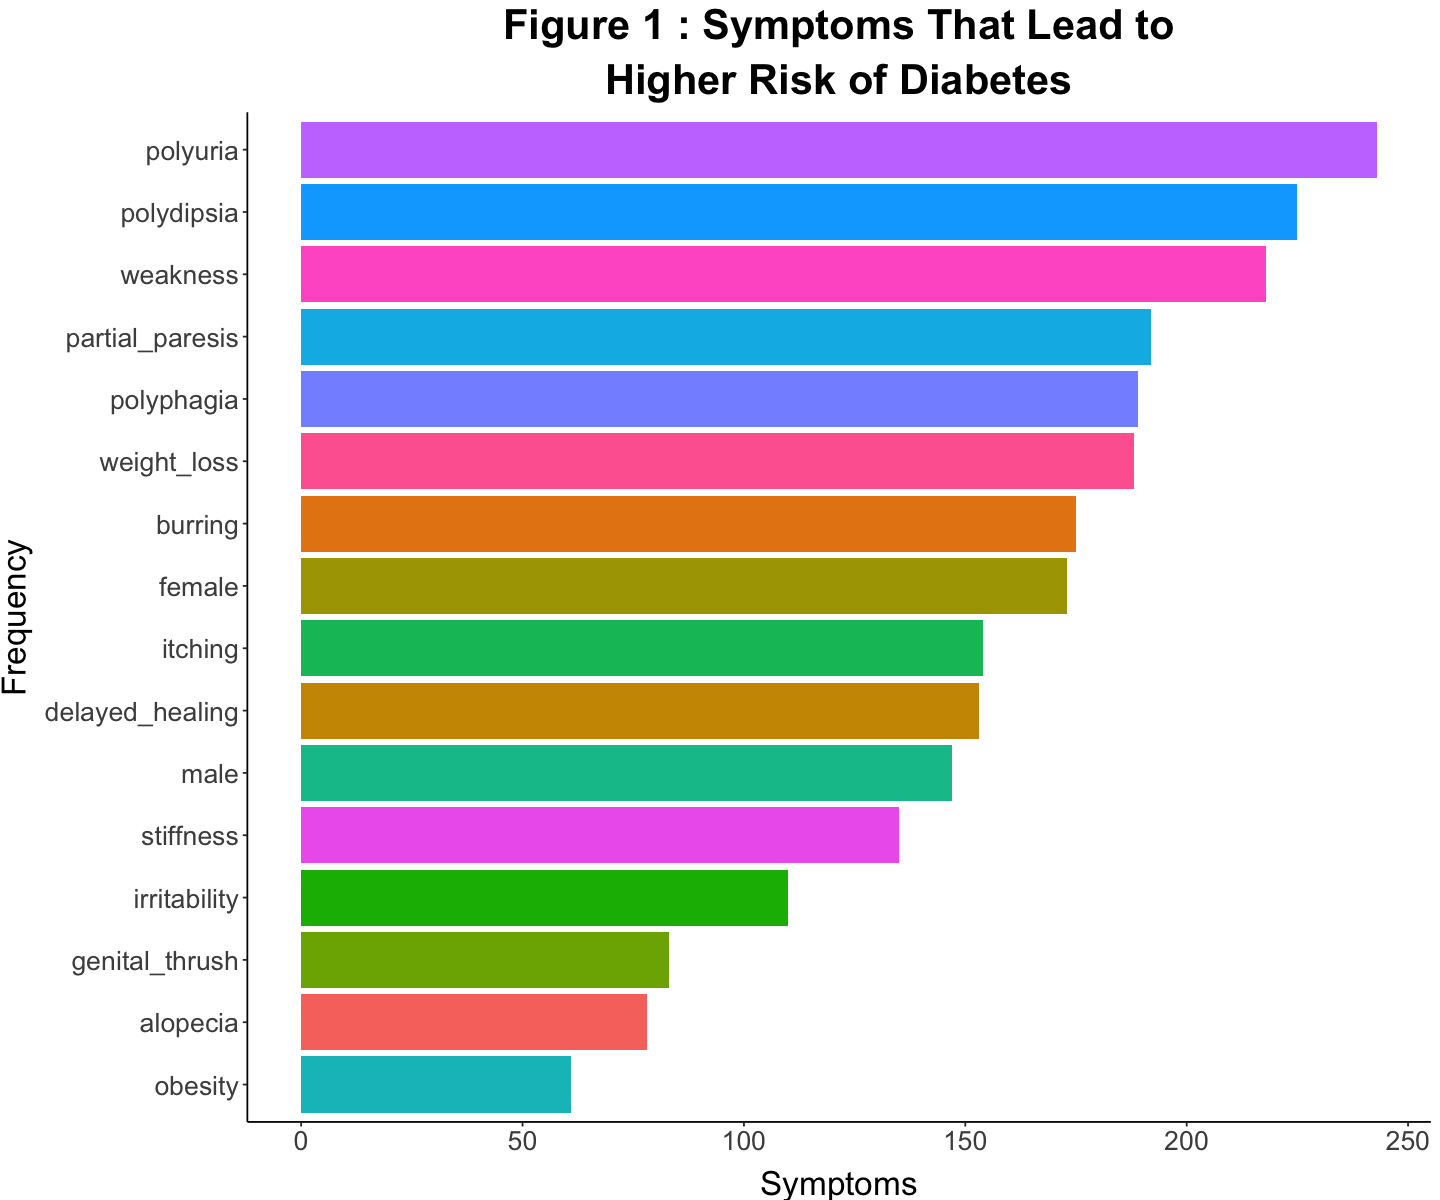

In [9]:
explore_test <- df %>%
    filter(class == "Positive") %>%
    select(-age, -class, -gender) %>%
    gather("variable", value) %>%
    filter(value == 1) %>%
    group_by(variable) %>%
    summarise(n = n())

ggplot(explore_test, aes(x = reorder(variable, n), y = n, fill = variable)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    theme_classic() +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5, vjust = 1, lineheight = 1.1, face = "bold", size = 25),
         legend.position = "none",
         axis.title.x = element_text(vjust = -0.5),
         axis.title.y = element_text(vjust = 2)) +
    labs(title = "Figure 1 : Symptoms That Lead to\nHigher Risk of Diabetes", x = "Frequency", y = "Symptoms")

To complete our analysis, we will split the data into two sets: the training and testing data sets.

In [10]:
df_split <- initial_split(df, prop = 0.75, strata = class)
df_train <- training(df_split)
df_test <- testing(df_split)

#### Visualizing the Training Data Set

For our exploratory data analysis for our training set, we decided to make a table and graph that show how much of our data is labeled positive and negative. This will help us in identifying if there are biases in our data because if we have a lot of positive labels, then our predictor will lean more towards that.

`summarise()` ungrouping output (override with `.groups` argument)



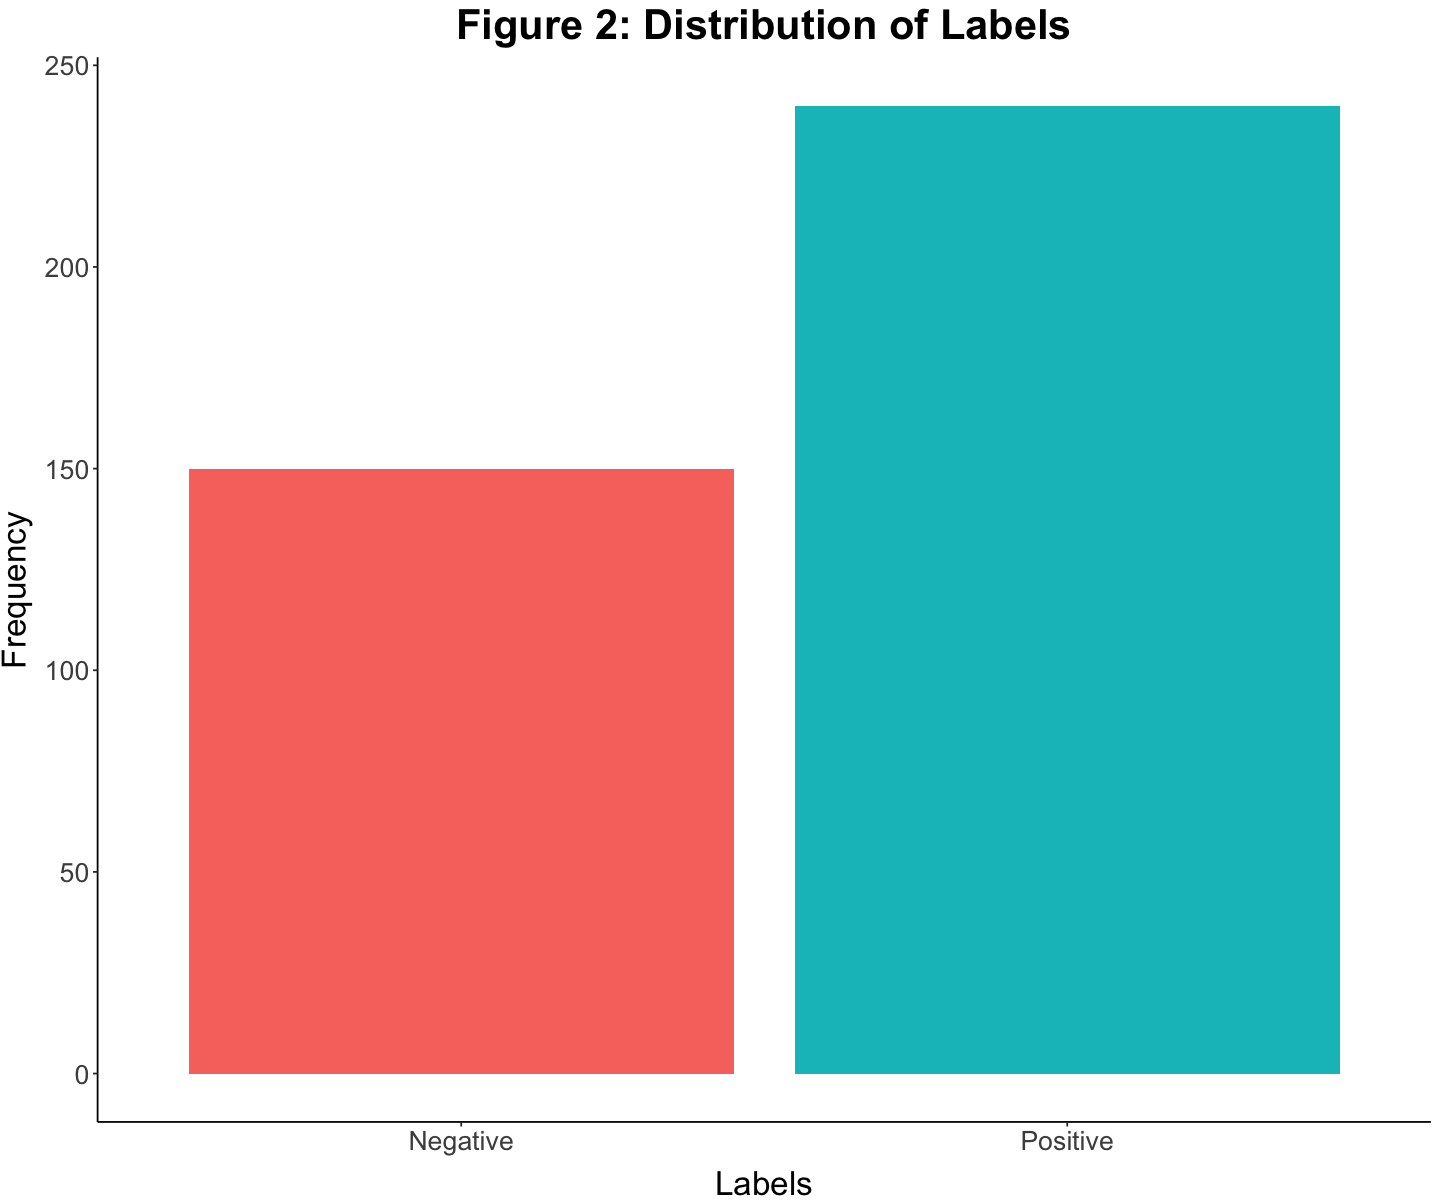

In [22]:
explore_train <- df_train %>%
    group_by(class) %>%
    summarise(n = n())

ggplot(explore_train, aes(x = class, y = n, fill = class)) +
    geom_bar(stat = "identity") +
    theme_classic() +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25),
         legend.position = "none",
         axis.title.x = element_text(vjust = -0.5),
         axis.title.y = element_text(vjust = 2)) +
    labs(title = "Figure 2: Distribution of Labels", x = "Labels", y = "Frequency")

This graph shows there are more data points with positive labels than negative ones. Our negative labels are about 2/3 of our positive labels. Going into this analysis we weren't assuming that there would be equal amounts, but we don't believe that this training data will create a noticeable amount of bias results due to the fact that this is not meant to be used as a replacement for a proper diagnosis. **This just means that our classifier will be more likely to predict a positive diagnosis than a negative one. This will alert the medical professionals that a more accurate diagnosis should be conducted.**

## Exploratory Analysis

To conduct our analysis, we used a correlation matrix heatmap in order to observe the correlation between certain physical disorders and a positive diabetes diagnosis.

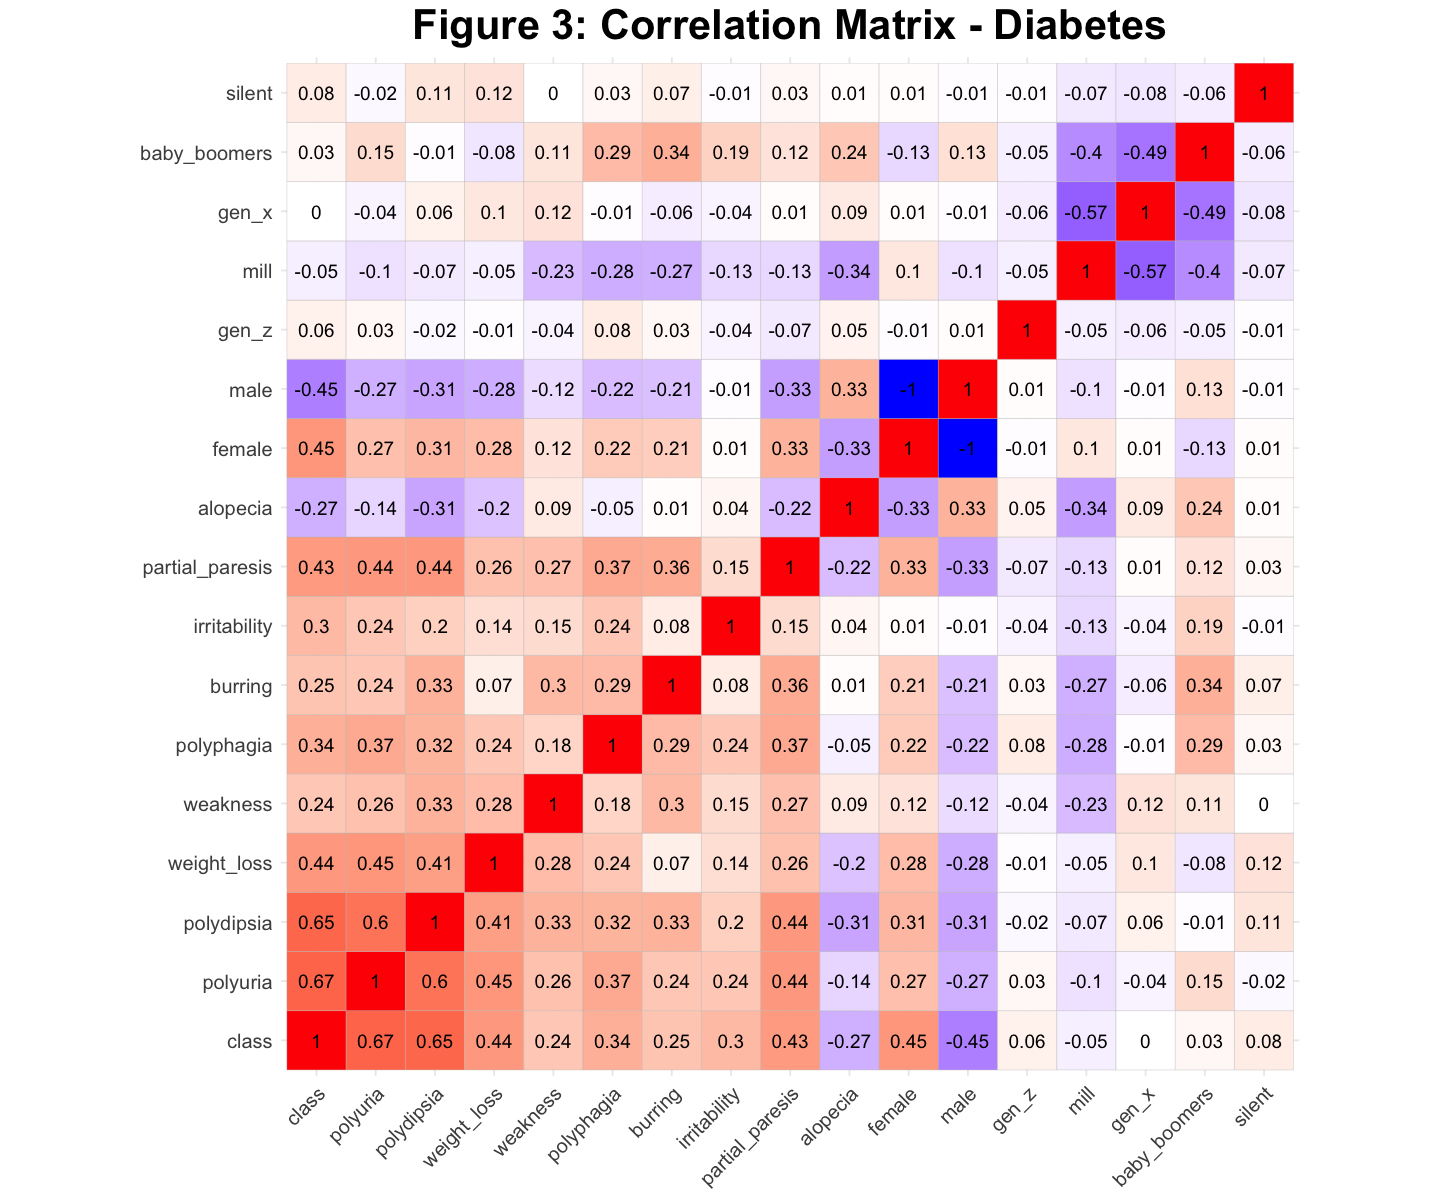

In [31]:
heatmap_df <- df %>% mutate(class = ifelse(class == 'Positive', 1, 0))

heatmap_df$gen_z <- ifelse(df$age >= 8 & df$age <= 25, 1, 0)
heatmap_df$mill <- ifelse(df$age >= 26 & df$age <= 40, 1, 0)
heatmap_df$gen_x <- ifelse(df$age >= 41 & df$age <= 55, 1, 0)
heatmap_df$baby_boomers <- ifelse(df$age >= 56 & df$age <= 74, 1, 0)
heatmap_df$silent <- ifelse(df$age >= 75 & df$age <= 94, 1, 0)

options(repr.plot.width = 12, repr.plot.height = 10)
corr_red <- heatmap_df %>%
    select(-age) %>%
    cor() 

ggcorrplot(corr_red, lab = TRUE,
           title = "Figure 3: Correlation Matrix - Diabetes") +
    theme(text = element_text(size = 20),
          plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25),
         legend.position = "none")

For this correlation map, we have chosen a 0.2 correlation coefficient as a threshold for our analysis. We consider variables with a correlation above this threshold to have a moderate or a strong connection to a positive diabetes diagnosis. 
Values below that threshold are considered for the purposes of our analysis to have little to no correlation to a diabetes diagnosis.

Our dataset has 17 variables, which is not optimal for knn-classification. Based on this correlation map, we have decided to select against these 5 variables that have little to no correlation with a positive diabetes diagnosis:

1. obesity
2. stiffness
3. delayed_healing
4. itching
5. genital_thrush

In [13]:
# clean code based on heatmap data

df <- df %>%
    select(-obesity, -stiffness, -delayed_healing, -itching, -genital_thrush, -gender)

head(df)

,age,class,polyuria,polydipsia,weight_loss,weakness,polyphagia,burring,irritability,partial_paresis,alopecia,female,male
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,40,Positive,0,1,0,1,0,0,0,0,1,0,1
2,58,Positive,0,0,0,1,0,1,0,1,1,0,1
3,41,Positive,1,0,0,1,1,0,0,0,1,0,1
4,45,Positive,0,0,1,1,1,0,0,0,0,0,1
5,60,Positive,1,1,1,1,1,1,1,1,1,0,1
6,55,Positive,1,1,0,1,1,1,0,0,1,0,1


#### Building our Classifier

To build our classifier, we will start by creating a recipe using our training dataset and performing cross-validation.

In [14]:
recipe <- recipe(class ~ . , data = df_train)
vfold <- vfold_cv(df_train, v = 5, strata = class)

Then, we will create a model specification for K-nearest neighbours classification, and tune it to choose the most accurate K value for our classifier.

Next, we will create a plot of the different k values and their accuracies and choose the value with the greatest accuracy estimate from our cross-validation, which turned out to be the value '2'. 

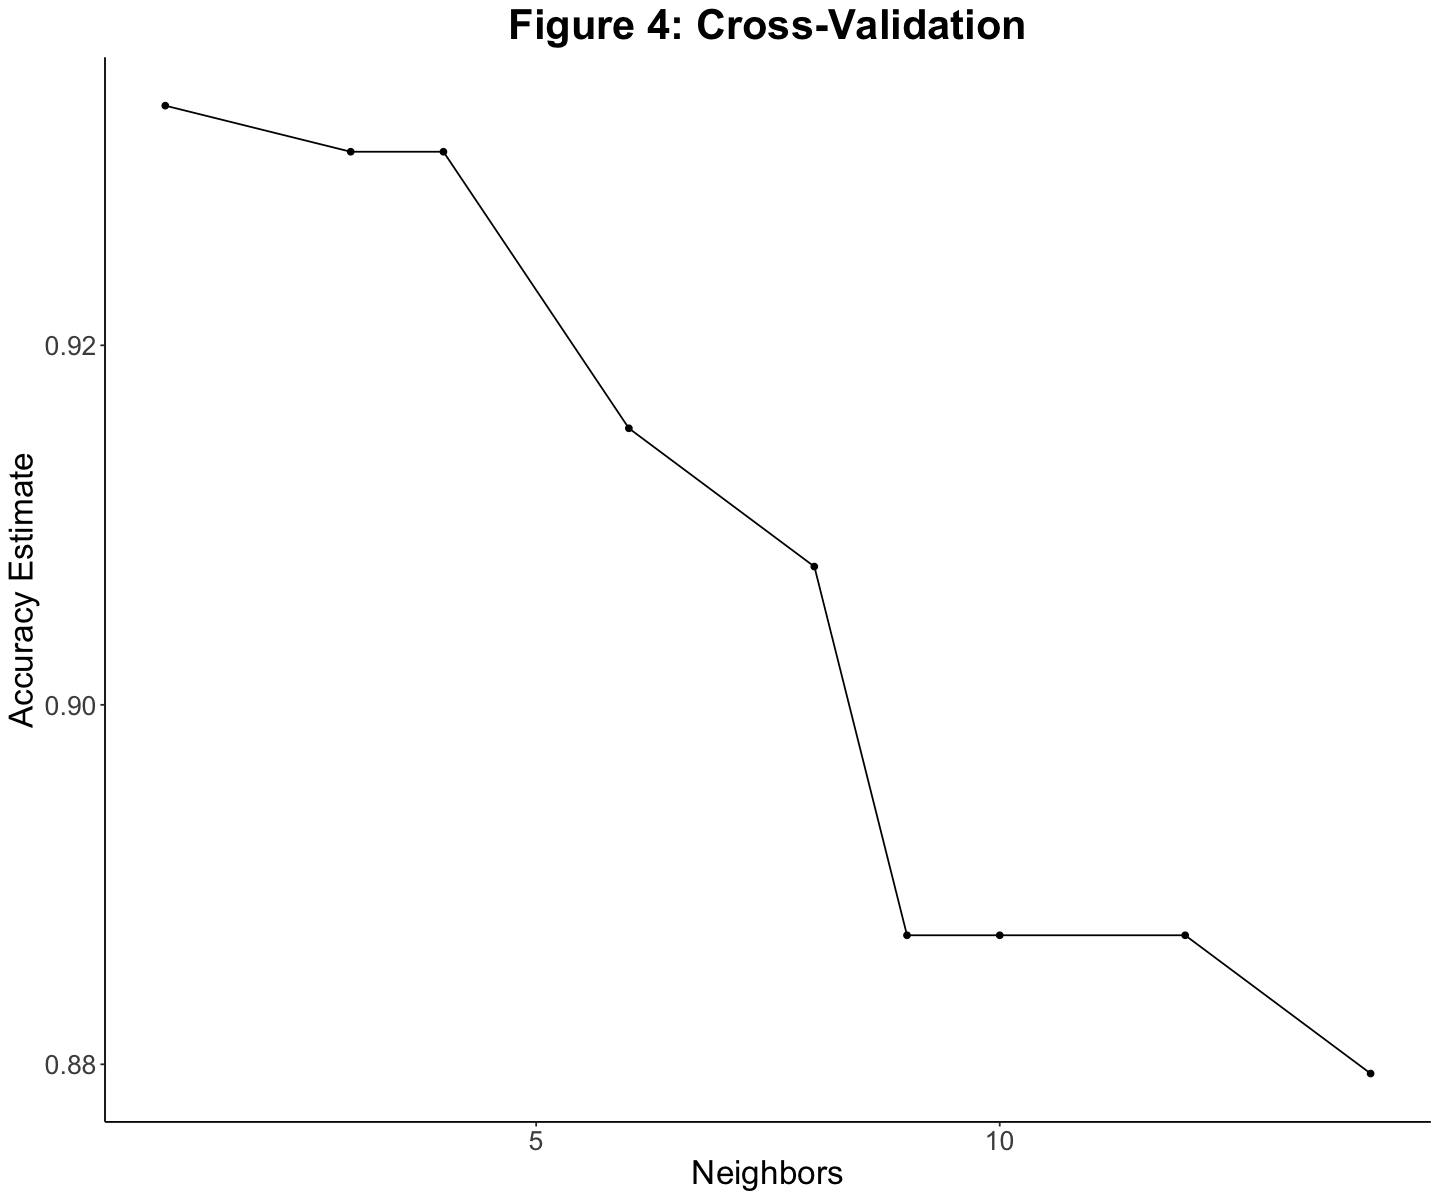

In [34]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
 
fit_find_n <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = vfold, grid = 10) %>%
    collect_metrics()

accuracies <- fit_find_n %>%
                 filter(.metric == 'accuracy')


plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    theme_classic() +
    theme(text = element_text(size = 20),
         plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25)) +
    labs(title = "Figure 4: Cross-Validation", x = 'Neighbors', y = 'Accuracy Estimate',
                  plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25),
         legend.position = "none",
         axis.title.x = element_text(vjust = -0.5),
         axis.title.y = element_text(vjust = 2))

plot

Finally, we make predictions on our testing data set using our classifier built with the K value of 2.

In [16]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) %>%
    set_engine("kknn") %>%
    set_mode("classification")

fit <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_spec_2) %>%
    fit(data = df_train)

diabetes_risk_predictions <- predict(fit, df_test) %>%
                            bind_cols(df_test)

accuracy <- diabetes_risk_predictions %>% metrics(truth = class, estimate = .pred_class)

conf <- diabetes_risk_predictions %>% conf_mat(truth = class, estimate = .pred_class)

accuracy
conf
head(diabetes_risk_predictions)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9615385
kap,binary,0.9202454


          Truth
Prediction Negative Positive
  Negative       50        5
  Positive        0       75

.pred_class,age,class,gender,polyuria,polydipsia,weight_loss,weakness,polyphagia,genital_thrush,burring,itching,irritability,delayed_healing,partial_paresis,stiffness,alopecia,obesity,female,male
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Positive,41,Positive,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1
Positive,60,Positive,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
Positive,66,Positive,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1
Positive,35,Positive,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1
Negative,54,Positive,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1
Positive,48,Positive,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1


## Visualization of Analysis

Because our analysis is multivariable, we can't visualize the graph because we can only render up to 3D, so we decided to show a comparision between how many correct predictions our model made and incorrect ones.

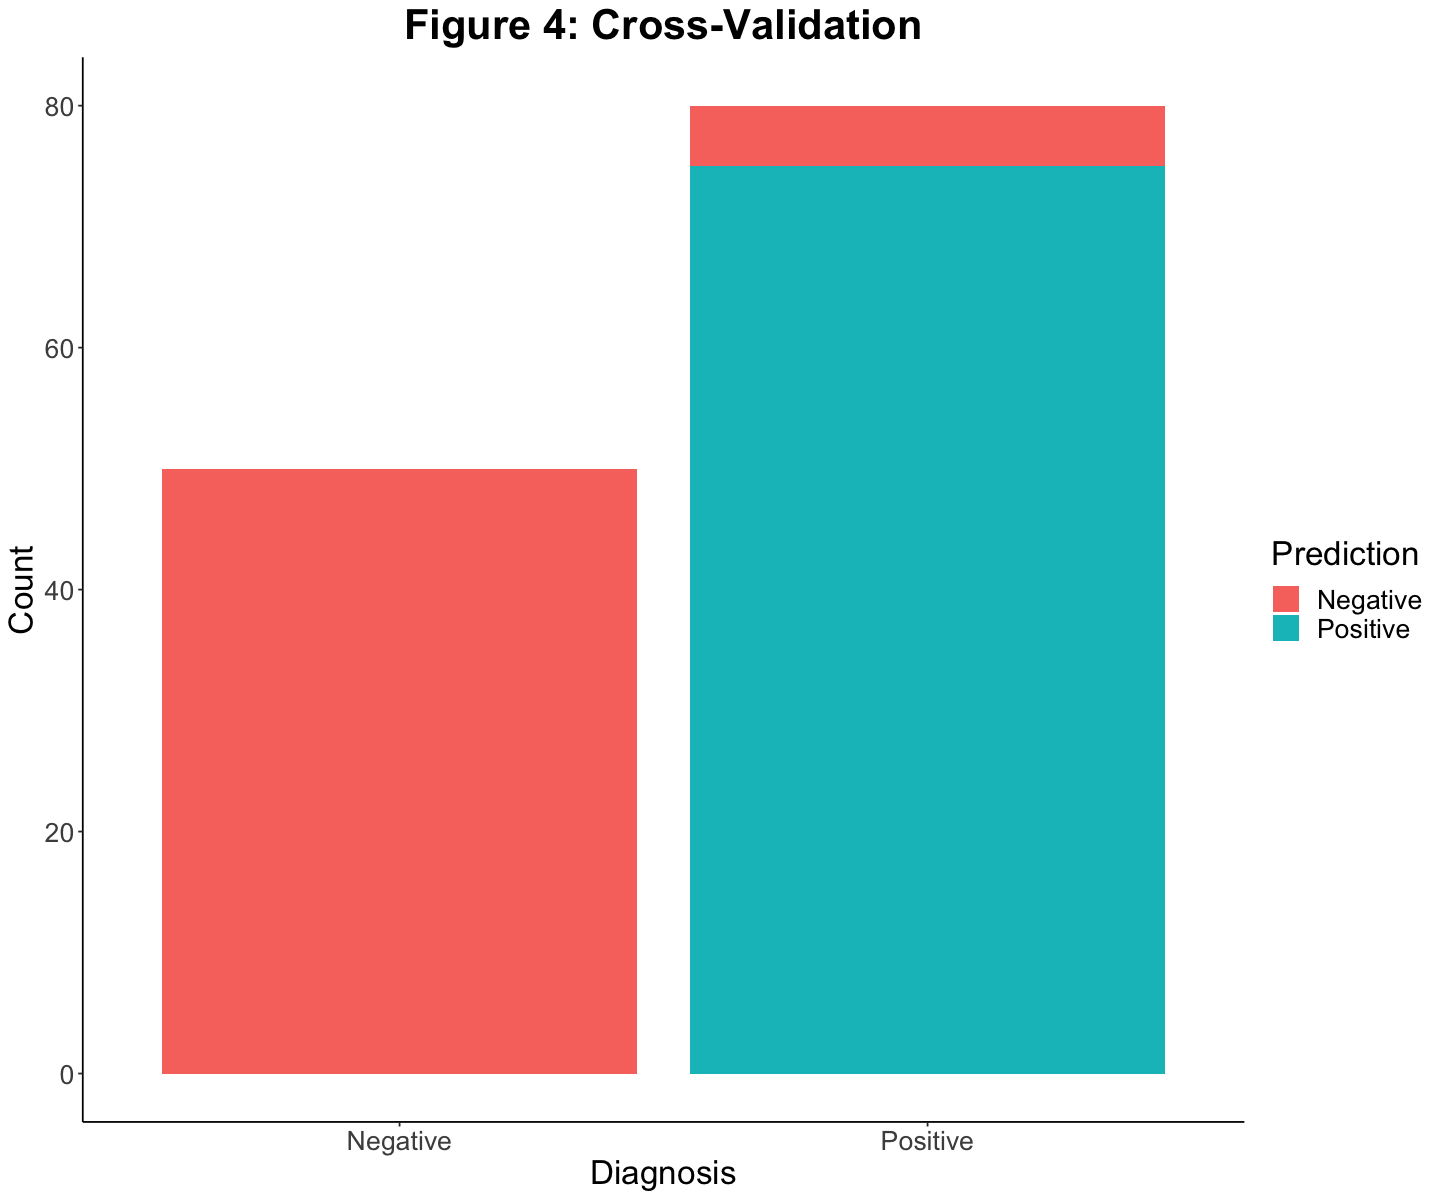

In [35]:
options(repr.plot.width = 12, repr.plot.height = 10)

dist_hist <- diabetes_risk_predictions %>%
    ggplot(aes(x = class, fill = .pred_class)) +
    geom_bar(stat = "count") +
    ggtitle("Figure 5: Distribution of classes") +
    scale_color_brewer(palette = "Dark2") +
    theme_classic() +
    theme(text = element_text(size = 20),
         plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25)) +
    labs(title = "Figure 4: Cross-Validation", x = "Diagnosis", y = "Count", fill = "Prediction",
                  plot.title = element_text(hjust = 0.5, vjust = 1, face = "bold", size = 25),
         axis.title.x = element_text(vjust = -0.5),
         axis.title.y = element_text(vjust = 2))
dist_hist

## Discussion

Based on our correlation matrix heatmap, polyuria was the variable most associated with a positive diabetes diagnosis with a 0.67 correlation value. Polyuria was followed by polydipsia (0.65), weight loss (0.44), partial paresis (0.43), polyphagia (0.34), irritability (0.3), burring (0.25), and weakness (0.24), in this particular descending order. The occurrence of one or more of these disorders increases a person's chance of being diagnosed with diabetes. Moreover, this indicates that someone with diabetes has a higher chance of having these disorders. The rest of the factors had little to no correlation with someone's diabetic diagnosis.

These findings are consistent with the current research on diabetes, as polyuria (increase in levels of urine) is one of the main symptoms of diabetes. That is because the increased concentration of glucose in the bloodstream makes it to the urine where it attracts more water. As a result, diabetic patients urinate more than healthy individuals, which leads to polydipsia (Polyuria is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate., 2020). Polydipsia is a condition of excessive thirst, with its patients drinking more water than normal. This information explains why polyuria and polydipsia are highly correlated with a positive diabetes diagnosis.

Hyperglycemic diabetic patients have increased concentrations of glucose in their bloodstream and they are unable to turn into energy because the mechanism for glucose transport into the cells is defective. This leads to polyphagia (an increase in the hunger levels of sick patients) and partial paresis (partial paralysis) as the body demands more energy. This constant need for energy explains why these two factors are also highly correlated with a positive diabetes diagnosis (Diabetes - Symptoms and causes, 2020).

In our proposal, we expected to find that variables like age, gender, weight loss, vision blurriness, and obesity would accurately predict whether or not an individual is diabetic. Out of these variables, only weight loss had a significant correlation with diabetes. Gender also shows a 0.45 correlation value, suggesting that males and females have similar chances of being diabetic. This could most likely be explained by the biases in our dataset because adult females are found to be at a higher risk of diabetes than males (Diabetes - Symptoms and causes, 2020). The most likely explanation for this correlation value is that our dataset has more diabetic males than diabetic females or that males are more likely to develop these other health problems as a consequence of diabetes.

Overall, our analysis confirmed the knowledge that medical professionals already had of diabetes, but also provided percentages of correlation between the health problems we already knew were connected to diabetes and a positive diagnosis.

These findings will enable hospitals to predict the likeliness of an individual to be diabetic after recording certain physical characteristics, especially in places with limited medical equipment. Given that many diabetic patients cannot undergo certain treatments, this will help save lives in undiagnosed patients.

A follow-up to this study could be an analysis of the impact of these variables on the life span of diabetic patients as it could help inform patients on how to make the appropriate life choices to increase their life expectancy.

### References

Diabetes. 2020. _Polyuria Is A Condition Where The Body Urinates More Than Usual And Passes Excessive Or Abnormally Large Amounts Of Urine Each Time You Urinate._. [online] Available at: <https://www.diabetes.co.uk/symptoms/polyuria.html#:~:text=Polyuria%20is%20a%20condition%20where,about%201%20to%202%20litres> [Accessed 23 November 2020].

Diabetes. 2020. _Since 1996, The Number Of People With Diabetes In The UK Has Risen From 1.4 Million To 3.5 Million. Diabetes Prevalence Is Estimated To Rise To 5 Million By 2025._. [online] Available at: <https://www.diabetes.co.uk/diabetes-prevalence.html#:~:text=World%20diabetes%20prevalence,with%20diabetes%20worldwide%20by%202040> [Accessed 23 November 2020].

Mayo Clinic. 2020. _Diabetes - Symptoms And Causes._ [online] Available at:                                                              <https://www.mayoclinic.org/diseasesconditions/diabetes/symptoms-causes/syc-20371444> [Accessed 23 November 2020].